In [2]:
import torch

from torch import nn
from torch.functional import F
from torch.optim import SGD
import seaborn as sns
import matplotlib.pyplot as plt
#datalaoder

In [3]:
class FirstNN (nn.Module):
  def __init__(self) :

    super().__init__()

    self.w00 = nn.Parameter(torch.tensor(1.1),requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.5),requires_grad=False)


    self.w01 = nn.Parameter(torch.tensor(0.6),requires_grad=False)
    self.b01 = nn.Parameter(torch.tensor(-1.5),requires_grad=False)


    self.w02 = nn.Parameter(torch.tensor(0.5),requires_grad=False)
    self.b02 = nn.Parameter(torch.tensor(0.65),requires_grad=False)

    self.w11 = nn.Parameter(torch.tensor(1.55),requires_grad=False)
    self.w12 = nn.Parameter(torch.tensor(-0.7),requires_grad=False)
    self.w13 = nn.Parameter(torch.tensor(1.22),requires_grad=False)


    self.w20 = nn.Parameter(torch.tensor(1.6),requires_grad=False)


  def forward(self,input: torch.Tensor) -> torch.Tensor:

    input_to_layer_01 = input * self.w00 + self.b00
    layer_01_output = F.relu(input_to_layer_01)
    layer_01_output*=self.w11

    input_to_layer_02 = input*self.w01 + self.b01
    layer_02_output = F.relu(input_to_layer_02)
    layer_02_output*=self.w12


    input_to_layer_03 = input * self.w02 + self.b02
    layer_03_output = F.relu(input_to_layer_03)
    layer_03_output*=self.w13



    output= layer_01_output + layer_02_output + layer_03_output
    output= F.tanh(output)
    output*=self.w20


    return output



In [4]:
first_model = FirstNN()

In [5]:
print (first_model)

FirstNN()


In [6]:
for name , param in first_model.named_parameters():
  print (name,param)

w00 Parameter containing:
tensor(1.1000)
b00 Parameter containing:
tensor(-0.5000)
w01 Parameter containing:
tensor(0.6000)
b01 Parameter containing:
tensor(-1.5000)
w02 Parameter containing:
tensor(0.5000)
b02 Parameter containing:
tensor(0.6500)
w11 Parameter containing:
tensor(1.5500)
w12 Parameter containing:
tensor(-0.7000)
w13 Parameter containing:
tensor(1.2200)
w20 Parameter containing:
tensor(1.6000)


In [9]:
true_inputs =  torch.linspace(start=1, end=2.5, steps=40)
true_inputs

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [10]:
true_outputs= first_model(true_inputs)
true_outputs

tensor([1.5702, 1.5750, 1.5790, 1.5824, 1.5853, 1.5877, 1.5897, 1.5914, 1.5928,
        1.5939, 1.5949, 1.5958, 1.5965, 1.5970, 1.5975, 1.5979, 1.5983, 1.5985,
        1.5988, 1.5990, 1.5991, 1.5993, 1.5994, 1.5995, 1.5996, 1.5996, 1.5997,
        1.5998, 1.5998, 1.5998, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999,
        1.6000, 1.6000, 1.6000, 1.6000])

Text(0.5, 0, 'input')

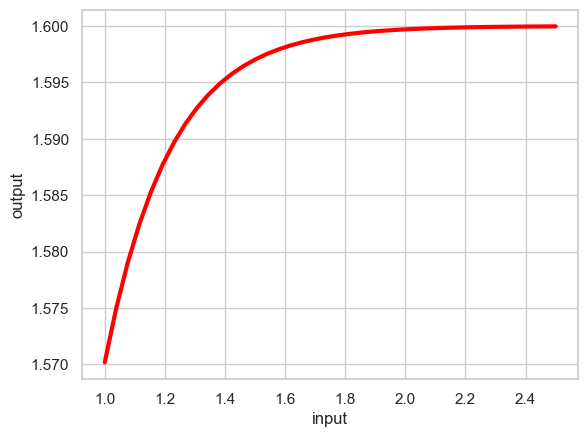

In [11]:
sns.set(style="whitegrid")

sns.lineplot(
    x=true_inputs,
    y=true_outputs,
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')

# lets_trian with opimize

In [13]:
class PlainFirstNN(nn.Module):

    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter( torch.tensor(0.0), requires_grad=True )
        self.b00 = nn.Parameter(torch.tensor(-0.5), requires_grad=False)

        self.w01 = nn.Parameter(torch.tensor(0.6), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(-1.5), requires_grad=False)

        self.w02 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b02 = nn.Parameter(torch.tensor(0.65), requires_grad=False)

        self.w11 = nn.Parameter(torch.tensor(1.55), requires_grad=False)
        self.w12 = nn.Parameter(torch.tensor(-0.7), requires_grad=False)
        self.w13 = nn.Parameter(torch.tensor(1.22), requires_grad=False)

        self.w20 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
    def forward(self, input):

        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = F.relu(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = F.relu(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = F.relu(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = F.tanh(output)
        output = output * self.w20

        return output

In [44]:
plain_first_nn = PlainFirstNN()

In [46]:
pred_outputs = plain_first_nn(true_inputs)
pred_outputs

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<MulBackward0>)

In [47]:
sns.set(style="whitegrid")

sns.lineplot(
    x=true_inputs,
    y=pred_outputs,
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

Text(0.5, 0, 'input')

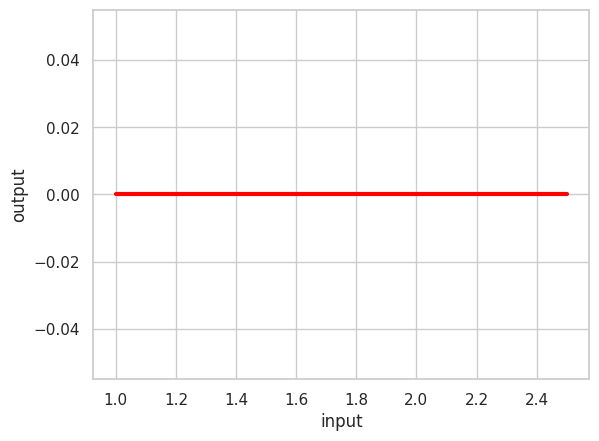

In [49]:
sns.set(style="whitegrid")

sns.lineplot(
    x=true_inputs,
    y=pred_outputs.detach(),
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')

### to improve the previouse to converge use optimizer

In [50]:
optimizer = SGD(plain_first_nn.parameters(),lr=0.01)
loss = nn.MSELoss()

In [54]:
for epoch in range (100):
  total_loss = 0

  for i in range(len(true_inputs)):

    input_i = true_inputs[i]
    true_output_i = true_outputs[i]

    pred_output_i = plain_first_nn(input_i)

    loss_value = loss(pred_output_i, true_output_i)
    loss_value.backward()

    total_loss +=loss_value
    print (f'epoch {epoch} loss {total_loss}')

  optimizer.step()
  optimizer.zero_grad()



epoch 0 loss 2.4654316902160645
epoch 0 loss 4.946048259735107
epoch 0 loss 7.439444541931152
epoch 0 loss 9.943586349487305
epoch 0 loss 12.456755638122559
epoch 0 loss 14.97750473022461
epoch 0 loss 17.504615783691406
epoch 0 loss 20.037063598632812
epoch 0 loss 22.573984146118164
epoch 0 loss 25.114656448364258
epoch 0 loss 27.658470153808594
epoch 0 loss 30.204917907714844
epoch 0 loss 32.753570556640625
epoch 0 loss 35.30406951904297
epoch 0 loss 37.856117248535156
epoch 0 loss 40.409461975097656
epoch 0 loss 42.963890075683594
epoch 0 loss 45.51922607421875
epoch 0 loss 48.075321197509766
epoch 0 loss 50.63205337524414
epoch 0 loss 53.1893196105957
epoch 0 loss 55.747032165527344
epoch 0 loss 58.305118560791016
epoch 0 loss 60.8635139465332
epoch 0 loss 63.42217254638672
epoch 0 loss 65.98104858398438
epoch 0 loss 68.54010772705078
epoch 0 loss 71.09931945800781
epoch 0 loss 73.65866088867188
epoch 0 loss 76.21810913085938
epoch 0 loss 78.77764892578125
epoch 0 loss 81.3372650146

In [55]:
pred_outputs = plain_first_nn(true_inputs)
pred_outputs

tensor([1.5462, 1.5518, 1.5570, 1.5618, 1.5662, 1.5702, 1.5739, 1.5774, 1.5805,
        1.5834, 1.5861, 1.5885, 1.5908, 1.5928, 1.5947, 1.5965, 1.5981, 1.5995,
        1.6009, 1.6021, 1.6033, 1.6043, 1.6053, 1.6062, 1.6070, 1.6077, 1.6084,
        1.6091, 1.6096, 1.6102, 1.6107, 1.6111, 1.6115, 1.6119, 1.6122, 1.6126,
        1.6129, 1.6131, 1.6134, 1.6136], grad_fn=<MulBackward0>)

Text(0.5, 0, 'input')

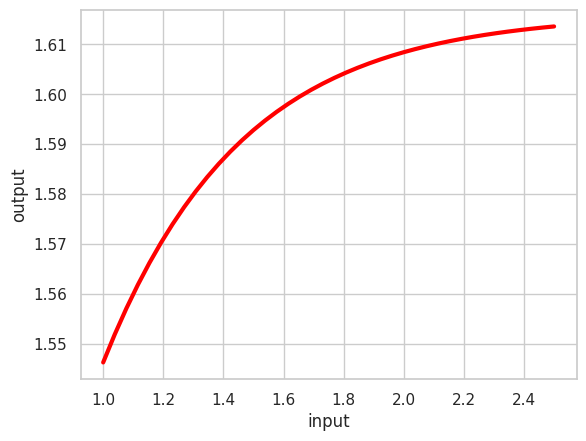

In [56]:
sns.set(style="whitegrid")

sns.lineplot(
    x=true_inputs,
    y=pred_outputs.detach(),
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')

## its become as the first nn

In [57]:
plain_first_nn.w00

Parameter containing:
tensor(0., requires_grad=True)

In [58]:
plain_first_nn.w02

Parameter containing:
tensor(0.9123, requires_grad=True)

In [59]:
plain_first_nn.w20

Parameter containing:
tensor(1.6161, requires_grad=True)